# Курсовая работа

Выполнил: Нурмухамедов Абубакир, группа М8О-114СВ-24

Датасет: Tourism and Economic Impact



## Tourism and Economic Impact

Этот набор данных включает в себя ключевые туристические и экономические показатели для более чем 200 стран, охватывающих годы с 1999 по 2023 год. Он охватывает широкий спектр данных, связанных с прибыванием туристов, расходами, поступлениями, ВВП, безработицей и инфляцией, помогая исследовать взаимосвязь между туризмом и экономическим ростом во всем мире.

Данные содержат информацию о туризме и экономических показателях по странам. Вот основные столбцы:

- **country**: Название страны
- **country_code**: Код страны
- **year**: Год
- **tourism_receipts**: Доходы от туризма
- **tourism_arrivals**: Количество туристов
- **tourism_exports**: Экспорт услуг, связанных с туризмом
- **tourism_departures**: Количество выезжающих туристов
- **tourism_expenditures**: Расходы туристов
- **gdp**: ВВП страны
- **inflation**: Уровень инфляции
- **unemployment**: Уровень безработицы

Набор данных взят из экономических и туристических баз данных Всемирного банка, предлагающих надежную и актуальную статистику по глобальным показателям туризма и экономики.


In [64]:
!pip install kagglehub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bushraqurban/tourism-and-economic-impact")

print("Path to dataset files:", path)

100%|██████████| 270k/270k [00:00<00:00, 24.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/bushraqurban/tourism-and-economic-impact/versions/1


#### DataLoader

In [54]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

csv_file_path = path + "/world_tourism_economy_data.csv"

class TourismEconomyDataset(Dataset):
    def __init__(self, csv_file, features, target, transform=None):
        """
        Args:
            csv_file (str): Path to the CSV file.
            features (list): List of feature column names.
            target (str): Target column name.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data = pd.read_csv(csv_file).dropna(subset=features + [target])
        self.features = features
        self.target = target
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        features = self.data.iloc[idx][self.features].values.astype(float)
        target = self.data.iloc[idx][self.target]
        sample = {'features': torch.tensor(features, dtype=torch.float32),
                  'target': torch.tensor(target, dtype=torch.float32)}

        if self.transform:
            sample = self.transform(sample)

        return sample

target_column = 'gdp'
dataset = TourismEconomyDataset(csv_file=csv_file_path,
                                  features=feature_columns,
                                  target=target_column)

dataloader = DataLoader(dataset, batch_size=32, shuffle=True)



#### Экземпляры данных

In [61]:
data = dataset.data
df=pd.DataFrame(data)
df=df.sort_values(by=['country','year'],ascending=[True,True]).reset_index(drop=True)
df.head()

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,12.204030,NaN,7.760536,2.654293e+11,7.819865,NaN
1,Africa Eastern and Southern,AFE,2000,7.035529e+09,1.535318e+07,9.686414,NaN,7.523516,2.872017e+11,8.601485,NaN
2,Africa Eastern and Southern,AFE,2001,7.489514e+09,1.585470e+07,10.840517,NaN,6.940725,2.609922e+11,5.840354,NaN
3,Africa Eastern and Southern,AFE,2002,8.266443e+09,1.738338e+07,11.280159,NaN,6.690369,2.678150e+11,8.763754,NaN
4,Africa Eastern and Southern,AFE,2003,1.220460e+10,1.784439e+07,13.600724,NaN,7.122378,3.557164e+11,7.449700,NaN


## Статистика

In [63]:
num_records = data.shape[0]
num_fields = data.shape[1]

record_size_bytes = data.memory_usage(deep=True).sum() / num_records
record_size_bits = record_size_bytes * 8

num_features = len([col for col in data.columns if col not in ['country', 'country_code', 'year']])

missing_values = data.isnull().sum()

data_types = data.dtypes

print("Количество записей: ", num_records)
print("Количество полей: ", num_fields)
print("Объём одной записи в битах: ", record_size_bits)
print("Количество фичей: ", num_features)
print("Количество пропусков: ")
print(missing_values)

Количество записей:  3888
Количество полей:  11
Объём одной записи в битах:  1672.2304526748972
Количество фичей:  8
Количество пропусков: 
country                    0
country_code               0
year                       0
tourism_receipts           0
tourism_arrivals           0
tourism_exports          256
tourism_departures      1895
tourism_expenditures     392
gdp                        0
inflation                232
unemployment            1424
dtype: int64


#### Типы данных

In [58]:
df.dtypes

,0
country,object
country_code,object
year,int64
tourism_receipts,float64
tourism_arrivals,float64
tourism_exports,float64
tourism_departures,float64
tourism_expenditures,float64
gdp,float64
inflation,float64


#### Общая статистика

In [59]:
df.describe()

,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
count,3888.000000,3.888000e+03,3.888000e+03,3632.000000,1.993000e+03,3496.000000,3.888000e+03,3656.000000,2464.000000
mean,2009.502572,3.332049e+10,5.598800e+07,16.310067,7.247476e+07,6.599395,1.830392e+12,5.487516,8.105432
std,6.062405,1.351772e+11,2.099900e+08,18.273638,2.124226e+08,4.052949,7.531333e+12,14.417589,5.507335
min,1999.000000,1.000000e+05,1.100000e+03,0.000956,2.000000e+03,0.157818,2.290998e+07,-9.797647,0.039000
25%,2004.000000,3.260000e+08,6.240000e+05,4.957469,1.084000e+06,4.064086,8.309639e+09,1.740187,4.311000
50%,2010.000000,1.871000e+09,2.632500e+06,8.822523,4.096000e+06,5.726571,4.951561e+10,3.436627,6.902000
75%,2015.000000,1.010800e+10,1.498225e+07,19.468424,2.153600e+07,7.894942,4.014085e+11,6.218914,10.285750
max,2020.000000,1.863069e+12,2.403074e+09,101.966999,2.034432e+09,28.192276,8.814985e+13,557.201817,37.320000


## Алгоритм

Применим регрессионный анализ для оценки влияния туризма на экономические показатели

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

filtered_data = data[["tourism_receipts", "tourism_arrivals", "gdp"]].dropna()

X = filtered_data[["tourism_receipts", "tourism_arrivals"]]
y = filtered_data["gdp"]

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказываем значения на тестовой выборке
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

coefficients = model.coef_
intercept = model.intercept_

r2, coefficients, intercept


(0.9640917345629278,
 array([   56.62575769, -1126.6476051 ]),
 16353408948.649658)

Результаты регрессионного анализа:

- Коэффициент детерминации (R²): 0.964. Модель объясняет 96.4% вариации ВВП, что указывает на высокую степень соответствия данных модели.
- Коэффициенты регрессии:
    - tourism_receiptstourism\_receipts: 56.6356.63 — каждый дополнительный доллар дохода от туризма связан с увеличением ВВП на 56.63 доллара (в среднем, при прочих равных условиях).
    - tourism_arrivalstourism\_arrivals: −1126.65-1126.65 — увеличение числа туристов на единицу связано с уменьшением ВВП на 1126.65 долларов, что может указывать на возможные перекосы в данных или влияние других факторов.
- Перехват (intercept): 1.64×10101.64 \times 10^{10} — базовое значение ВВП, если оба признака равны нулю.

## Кластеризация

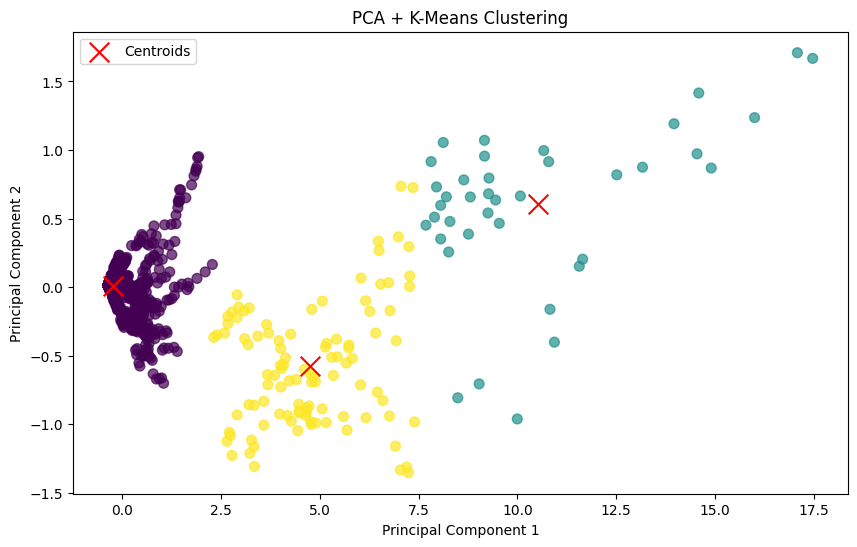

In [51]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Визуализация результатов PCA и кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='x', label='Centroids')
plt.title('PCA + K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


На графике представлена кластеризация данных с использованием метода K-средних после снижения размерности с помощью PCA до двух компонентов:

- Каждая точка представляет страну или регион.
- Цвета обозначают принадлежность к кластерам.
- Красные кресты — центроиды кластеров.

## Выбросы

In [52]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope

# Применим несколько методов для поиска выбросов

# 1. Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
iso_outliers = iso.fit_predict(X_scaled)

# 2. Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_outliers = lof.fit_predict(X_scaled)

# 3. Elliptic Envelope (модель Гауссовской ковариации)
elliptic = EllipticEnvelope(contamination=0.05, random_state=42)
elliptic_outliers = elliptic.fit_predict(X_scaled)

# Подсчет выбросов по каждому методу
iso_outliers_count = sum(iso_outliers == -1)
lof_outliers_count = sum(lof_outliers == -1)
elliptic_outliers_count = sum(elliptic_outliers == -1)

iso_outliers_count, lof_outliers_count, elliptic_outliers_count


(195, 195, 195)

Все три метода выявили одинаковое количество выбросов в данных — 195 объектов (примерно 5% от общего числа)

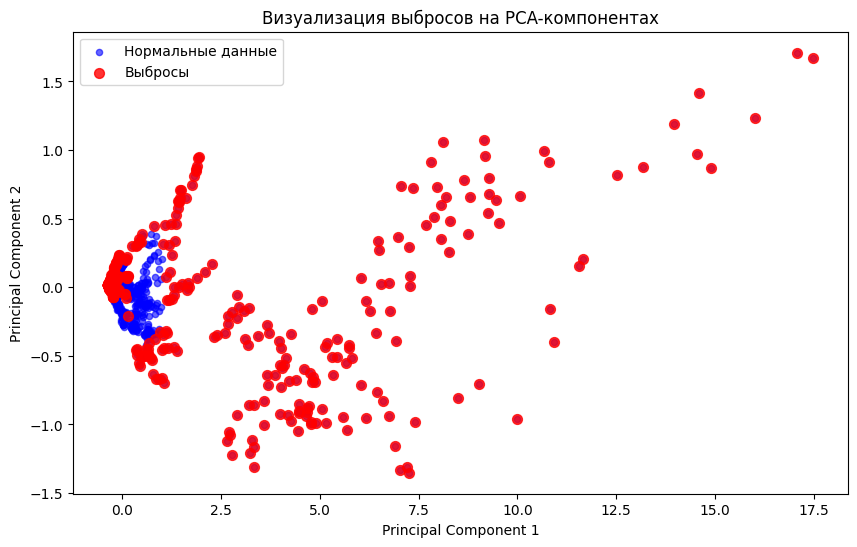

In [53]:
# Визуализация выбросов с использованием PCA-компонент
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', s=20, alpha=0.6, label='Нормальные данные')
plt.scatter(
    X_pca[outliers, 0],
    X_pca[outliers, 1],
    c='red',
    s=50,
    alpha=0.8,
    label='Выбросы'
)
plt.title('Визуализация выбросов на PCA-компонентах')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


На графике показаны выбросы (красные точки) в пространстве двух главных компонент, полученных с помощью PCA. Большинство данных сосредоточено в основной массе, а выбросы располагаются за пределами кластеров.

## ML systems design

Использование моделей регрессии для оценки влияния туризма (доходов, числа туристов) на экономические показатели (например, ВВП) в странах.

Применение:

- Системы поддержки принятия решений в правительственных организациях.
- Планирование бюджетов для развития туризма.
- Оценка потенциальных инвестиций в туристическую инфраструктуру.

Преимущества:

- Простота интерпретации линейных моделей.
- Возможность количественного анализа ключевых факторов.

Недостатки:

- Линейная регрессия может не учесть нелинейные взаимосвязи.
- Требуется тщательная подготовка данных для уменьшения влияния выбросов.